<a href="https://colab.research.google.com/github/IsraelPanazollo/Problema_de_Clusterizacao/blob/main/Aplicacao_Clusterizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>APLICAÇÃO DE  CLUSTERIZAÇÃO</font>
***

# Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

## Verificação das versões

In [2]:
print('Versão do pandas -> %s' % pd.__version__)
print('Versão do numpy -> %s' % np.__version__)
print('Versão do seaborn -> %s' % sns.__version__)
print('Versão do sklearn -> %s' % sklearn.__version__)

Versão do pandas -> 2.0.3
Versão do numpy -> 1.25.2
Versão do seaborn -> 0.13.1
Versão do sklearn -> 1.2.2


# Exploração os dados

## Carregar os dados

O dataset possui as informações de uso de cartão de crédito de diversos clientes. A seguir está o que cada coluna representa:

* CUST_ID: Identificação do titular do cartão de crédito (categórica)
* BALANCE: Valor do saldo restante em sua conta para fazer compras
* BALANCE_FREQUENCY: frequência com que o saldo é atualizado, pontuação entre 0 e 1 (1 = atualizado com frequência, 0 = atualizado pouco frequentemente)
* PURCHASES: Quantidade de compras feitas na conta
* ONEOFF_PURCHASES: valor máximo de compra feita de uma só vez
* INSTALLMENTS_PURCHASES : Valor da compra parcelada
* CASH_ADVANCE: Adiantamento em dinheiro dado pelo usuário
* PURCHASES_FREQUENCY: Com que frequência as compras estão sendo feitas, pontuação entre 0 e 1 (1 = comprada com frequência, 0 = comprada com pouca frequência)
* ONEOFFPURCHASESFREQUENCY: com que frequência as compras acontecem de uma só vez (1 = compradas com frequência, 0 = compradas com pouca frequência)
* PURCHASESINSTALLMENTSFREQUENCY : Com que frequência as compras parceladas estão sendo feitas (1 = feitas com frequência, 0 = raramente feitas)
* CASHADVANCEFREQUENCY: Com que frequência o adiantamento em dinheiro é pago
* CASHADVANCETRX: Número de transações realizadas com “Cash in Advanced”
* PURCHASES_TRX: Número de transações de compra realizadas
* CREDIT_LIMIT: Limite de cartão de crédito por usuário
* PAYMENTS: Valor do pagamento feito pelo usuário
* MINIMUM_PAYMENTS: valor mínimo de pagamentos feitos pelo usuário
* PRCFULLPAYMENT: Porcentagem do pagamento integral pago pelo usuário
* TENURE: Posse do serviço de cartão de crédito para uso




In [3]:
dados = pd.read_csv("CC GENERAL.csv")

In [4]:
dados.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Apresentar informações básicas

Vemos que o dataset inclui 8950 registros em 18 campos, sendo a maioria deles números, com exceção do CUST_ID que é usado para identificação do cliente.

In [5]:
dados.shape

(8950, 18)

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Tratamento dos dados

Como foi constatada a presença de registros ausentes no limite de crédito e nos pagamentos mínimos, vamos preencher com zero os valores mínimos e o valor médio de crédito para o limite.

In [7]:
dados['CREDIT_LIMIT'].fillna(dados['CREDIT_LIMIT'].mean(), inplace=True)

In [8]:
dados['MINIMUM_PAYMENTS'].fillna(0.0, inplace = True)

In [9]:
dados.isna().sum().sum()

0

Como o ID é único, não será relevantes para os estudos. Além disso, como o contrato de renovação é uma constante para todos, este será removido.

In [10]:
dados.drop(["CUST_ID", "TENURE"], axis = 1, inplace = True)

# Clusterização

## Pré-processamento

Como os dados estão em escalas diferentes, faremos um pré-processamento dos dados aplicando uma normalização neles, isto é, colocando os dados numa escala de 0 a 1.

In [11]:
from sklearn.preprocessing import Normalizer

normalizador = Normalizer()
dados_transformados = normalizador.fit_transform(dados)

## Aplicação do K-means

O modelo com K-Means buscará agrupar os dados em clusters que possuem características comuns entre si e diferentes entre outrs clusters. Cria-se uma função para evitar as repetições.

In [12]:
seed = 42
np.random.seed(seed)

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def clusterizacao(n, dados):
  modelo = KMeans(n_clusters=n, n_init = 10, max_iter=300, random_state = seed)
  predicao = modelo.fit_predict(dados)
  ss = silhouette_score(dados, predicao, metric = 'euclidean')
  dbs = davies_bouldin_score(dados, predicao)
  chs = calinski_harabasz_score(dados, predicao)

  print("O escore de Silhouette do modelo é: ", ss)
  print("O escore de Davies-Bouldin do modelo é: ", dbs)
  print("O escore de Calinski-Harabasz do modelo é: ", chs)

Não basta apenas realizar a clusterização. Será importante validar os modelos com métricas e verificar quais são mais apropriados. Todos os índices tratam da compactação no cluster e da separação entre clusters, mas através de cálculos distintos.

* O índice Silhouette é um valor de -1 a 1, e quanto mais próximo de 1, isto indica que os clusters estão mais separados entre si.

* O índice Davis-Bouldin avalia a similaridade. Nesse caso os valores mais próximos de zero representam clusterizações mais bem sucedidas.

* O índice Calinski-Harabasz trata da dispersão entre os clusters, fazendo uso da variância. Quanto maior este índice melhor é a clusterização.

Foram aplicados 3 modelos diferentes, cada qual com números de clusters distintos. O primeiro tem 5, o segundo possui 3 e terceiro com 10. Diantes dos resultados dos escores, nota-se que a clusterização com 5 obteve melhores índices.

In [14]:
clusterizacao(5, dados_transformados)

O escore de Silhouette do modelo é:  0.36544919030961814
O escore de Davies-Bouldin do modelo é:  1.0752672763103752
O escore de Calinski-Harabasz do modelo é:  3446.613589198001


In [15]:
clusterizacao(3, dados_transformados)

O escore de Silhouette do modelo é:  0.3283794178494738
O escore de Davies-Bouldin do modelo é:  1.3095448993536187
O escore de Calinski-Harabasz do modelo é:  3540.967888705778


In [16]:
clusterizacao(3, dados_transformados)

O escore de Silhouette do modelo é:  0.3283794178494738
O escore de Davies-Bouldin do modelo é:  1.3095448993536187
O escore de Calinski-Harabasz do modelo é:  3540.967888705778


Outra forma de validação é aplicar o modelo de clusterização a um conjunto de dados aleatórios e verificar as métricas. Dessa forma, pode-se constatar que as métricas da clusterização com os dados bancários estão bem melhores do que com um conjunto aleatório e podemos ter uma linha de base.

In [17]:
dados_aleatorios = np.random.rand(8950,16)
clusterizacao(5, dados_aleatorios)

O escore de Silhouette do modelo é:  0.038998781594591275
O escore de Davies-Bouldin do modelo é:  3.5946000002706398
O escore de Calinski-Harabasz do modelo é:  302.11740552402136


Uma forma distinta de validar o modelo é separar o conjunto de dados e realizar a clusterização nos subconjuntos e comparar as métricas. Percebe-se valores semelhantes entre si e com o modelo utilizando todos os dados.

In [18]:
conjunto_1, conjunto_2, conjunto_3, conjunto_4 = np.array_split(dados_transformados, 4)
print('='*30)
clusterizacao(5, conjunto_1)
print('='*30)
clusterizacao(5, conjunto_2)
print('='*30)
clusterizacao(5, conjunto_3)
print('='*30)
clusterizacao(5, conjunto_4)

O escore de Silhouette do modelo é:  0.36636908337641083
O escore de Davies-Bouldin do modelo é:  1.0725787238251059
O escore de Calinski-Harabasz do modelo é:  893.6795318014866
O escore de Silhouette do modelo é:  0.3464100580222663
O escore de Davies-Bouldin do modelo é:  1.1315694984234235
O escore de Calinski-Harabasz do modelo é:  878.1454858968939
O escore de Silhouette do modelo é:  0.36641058711824
O escore de Davies-Bouldin do modelo é:  1.0812778849707372
O escore de Calinski-Harabasz do modelo é:  877.8218042814686
O escore de Silhouette do modelo é:  0.37495871703285377
O escore de Davies-Bouldin do modelo é:  1.1553168196423083
O escore de Calinski-Harabasz do modelo é:  898.4105570617337


# Avaliação do modelo

Com o melhor modelo obtido podemos realizar algumas análises.

In [19]:
modelo = KMeans(n_clusters=5, n_init = 10, max_iter=300, random_state = seed)
predicao = modelo.fit_predict(dados_transformados)

Adiciona-se uma nova coluna com os rótulo do cluster nos registros.

In [20]:
dados['cluster'] = predicao

Podemos avaliar a quantidade de compras e o pagamento das contas feitas pelos usuários e apresentar conforme os valores dos clusters.

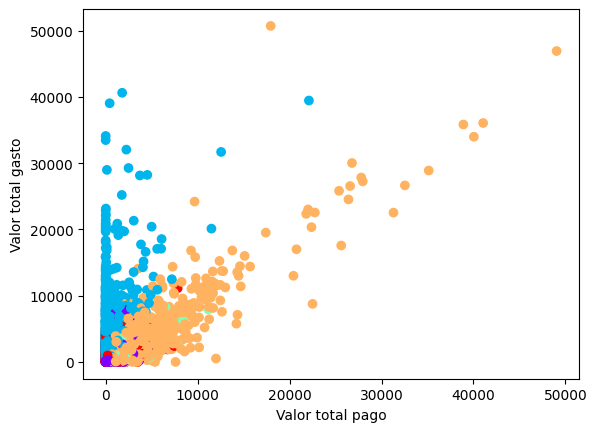

In [21]:
plt.scatter(dados['PURCHASES'], dados['PAYMENTS'], c= predicao, cmap='rainbow')
plt.xlabel("Valor total pago")
plt.ylabel("Valor total gasto")
plt.show()

Podemos ver a frequência dos valores do saldo da conta de cada cluster

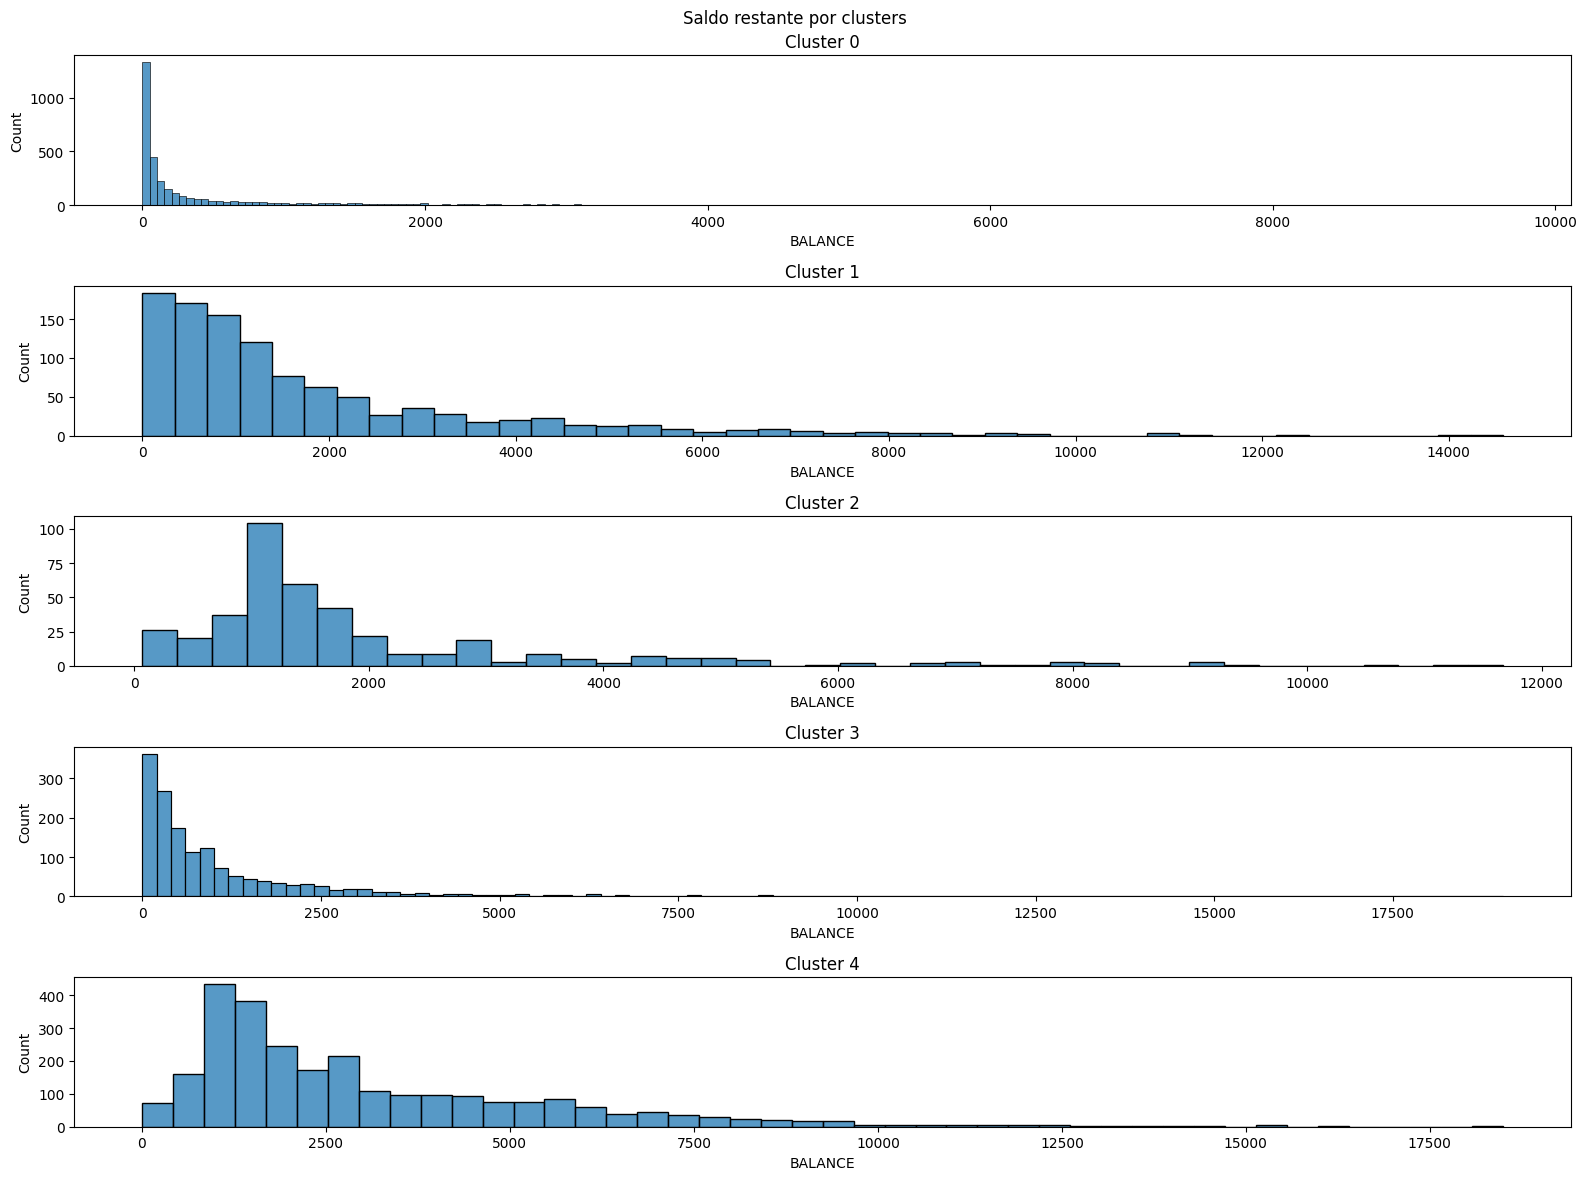

In [22]:
num_clusters = len(dados['cluster'].unique())

plt.figure(figsize=(16,12))
plt.suptitle('Saldo restante por clusters')

for i in range(num_clusters):
    dados_cluster = dados.query(f'cluster == {i}')
    plt.subplot(5, 1, i+1)
    sns.histplot(data=dados_cluster, x='BALANCE')
    plt.title(f'Cluster {i}')

plt.tight_layout()
plt.show()

Pode-se ainda agrupar os clusters e avaliar algumas das características em média de cada cluster. Daqui podemos tirar as seguintes conclusões em média:

* Cluster 0: possui o maior número de ocorrências, compreende um grupo com o menor saldo, porém com o maior limite, sendo um grupo que em geral não realiza muitos pagamentos.

* Cluster 1: Possuem um bom saldo em conta, compram pouco,  realizam os maiores adiantamentos em dinheiro, com os maiores pagamentos.

* Cluster 2: Menor número de clientes, possuem bom saldo, bons pagamentos, boa quantidade de compras

* Cluster 3: Clientes que fazer a maior quantidade de compras, com alto limite, com altos pagamentos.

* Cluster 4: Clientes com o maior saldo na conta, com alto valor de crédito, mas realizam a menor quantidade de compras.

In [23]:
clusters = dados.groupby("cluster")[["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]]
n_clientes = clusters.size()
clusters = clusters.mean()
clusters['n_clientes'] = n_clientes
print(clusters)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0         442.826380   629.320580    143.211009   5135.550158   813.510360   
1        1794.764536   475.785508   3270.705696   3975.462453  4706.788521   
2        1987.146873   858.326286    420.107194   2226.699029  1338.974045   
3        1139.517570  3262.893253    182.732840   4094.011764  3032.492972   
4        3039.831446   385.005706   1634.258107   4498.262840   969.420888   

         n_clientes  
cluster              
0              3274  
1              1073  
2               412  
3              1543  
4              2648  


Podemos descobrir quais características possuem a maior influência na determinação do cluster através da decomposição PCA, ou análise da componentes principais.

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7, random_state=seed)
aplicacao_pca = pca.fit_transform(dados)

Com essa análise obtemos as 7 principais colunas dentre as 18 existentes.

In [25]:
colunas_principais = []
for i in range(7):
  nome = pca.feature_names_in_[i]
  colunas_principais.append(nome)
colunas_principais

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY']

In [26]:
resultado = pd.DataFrame(columns = colunas_principais, data = aplicacao_pca)
resultado.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY
0,-4322.776843,912.592363,211.781386,-143.749119,60.877557,9.565977,-65.544126
1,4122.543452,-2440.428765,2343.172562,-3932.194768,50.173693,-1450.293372,83.853765
2,1499.842438,-2003.250287,-2097.383924,1070.583389,-298.691993,391.061076,-582.764512
3,1279.256138,-1330.362978,-2952.587344,1085.550573,-582.138417,-725.203639,-640.314477
4,-3739.353822,748.584391,538.975217,-220.267422,-222.085516,566.490518,-229.394879


Essas 7 colunas são responsáveis por explicar quase completamente a variância dos dados.

In [27]:
pca.explained_variance_ratio_.sum()

0.9999920055384811

Com essas colunas, realiza-se a visualização da correlação entre as variáveis.

In [28]:
correlacao = dados[['cluster',
  'BALANCE',
  'BALANCE_FREQUENCY',
  'PURCHASES',
  'ONEOFF_PURCHASES',
  'INSTALLMENTS_PURCHASES',
  'CASH_ADVANCE',
  'PURCHASES_FREQUENCY']].corr()

Pode-se notar o poder explicativo das características aqui, dentre as quais destacam-se saldo restante e a frequência que este saldo é alterado.

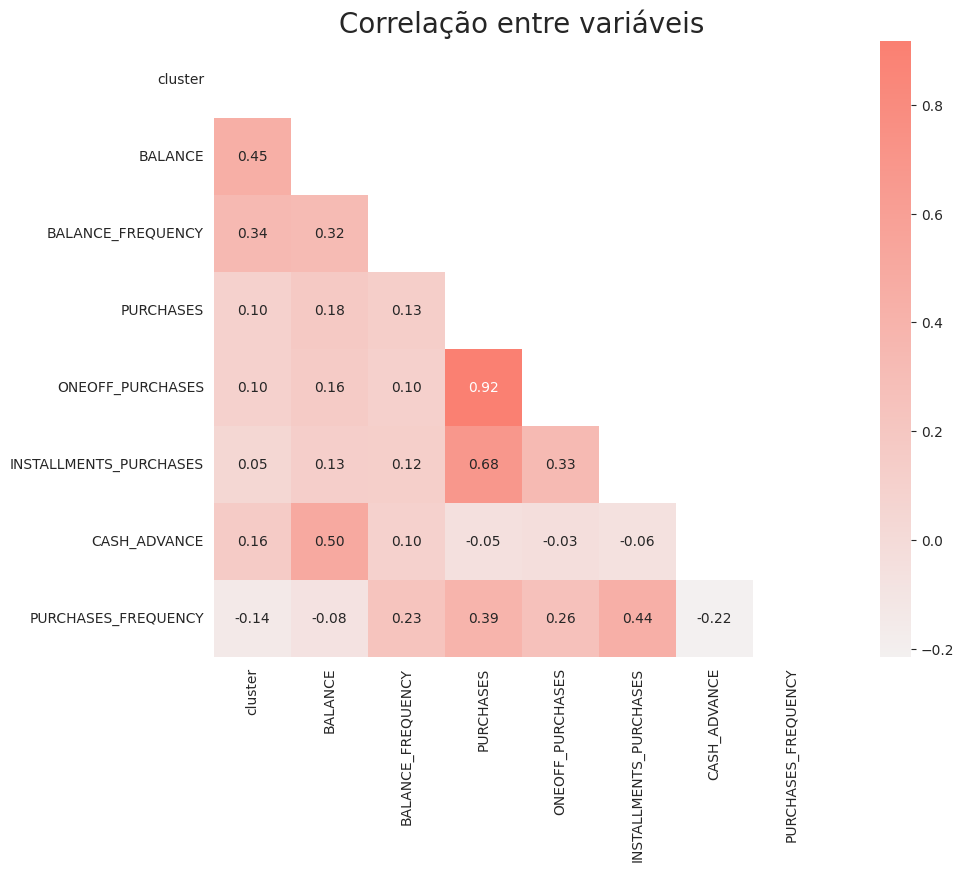

In [29]:
cores = sns.color_palette('light:salmon', as_cmap=True)
mascara = np.zeros_like(correlacao)
mascara[np.triu_indices_from(mascara)] = True
with sns.axes_style("white"):
  f, ax = plt.subplots(figsize = (13,8))
  ax = sns.heatmap(correlacao, cmap = cores, mask = mascara, square = True, fmt = '.2f', annot = True)
  ax.set_title('Correlação entre variáveis', fontsize=20)

## Teste do modelo

Vamos criar um cliente fictício que tenha um bom saldo em conta, um alto limite, que faça poucas compras e veremos como o modelo classifica a pessoa. Segundo essas características é mais provável que faça parte do Cluster 4.

In [30]:
dados_cliente = pd.DataFrame({
  'BALANCE': [2500.0],
  'BALANCE_FREQUENCY': [0.500000],
  'PURCHASES': [25.00000],
  'ONEOFF_PURCHASES': [0.000000],
  'INSTALLMENTS_PURCHASES': [25.00000],
  'CASH_ADVANCE': [1000.000000],
  'PURCHASES_FREQUENCY': [0.5],
  'ONEOFF_PURCHASES_FREQUENCY': [0.000000],
  'PURCHASES_INSTALLMENTS_FREQUENCY': [0.5],
  'CASH_ADVANCE_FREQUENCY': [0.500000],
  'CASH_ADVANCE_TRX': [0.000000],
  'PURCHASES_TRX': [5.000000],
  'CREDIT_LIMIT': [5000.000000],
  'PAYMENTS': [2000.0],
  'MINIMUM_PAYMENTS': [500.00000],
  'PRC_FULL_PAYMENT': [0.000000 ]
})

In [31]:
predicao_cliente = modelo.predict(dados_cliente)
print('O cliente pertence ao Cluster', predicao_cliente[0])

O cliente pertence ao Cluster 4


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


## Exportação do modelo

Vamos exportar o modelo para utilizar em outra situação.

In [33]:
import pickle
output = open('modelo', 'wb')
pickle.dump(modelo, output)
output.close()